# Collating Synthetic Data Results

This notebook is to collate synthetic data results for causal GAN

In [1]:
#imports
import pandas as pd
import collections
import os
import numpy as np
import sys
import plotly.graph_objects as go
import pandas as pd
import copy
debug=False
sys.path.append('generative_models')

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier
# all datasets
all_dn=[str(i) for i in master_spec['dataset_spec'].index]
gaussian_results_dict=collections.OrderedDict()

#set idx of gaussian dataset here
ds_idx=[d for d in range(20,21)]

candidate_names=['n{0}_gaussian'.format(k) for k in ds_idx]
rel_dn=np.array([n for n in all_dn if np.any([c in n for c in candidate_names])])
#os.chdir('../jp/')

#imports

#os.chdir('py')
#from results_collate import *


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/')


#using this one to make function silent
# from https://codereview.stackexchange.com/questions/25417/is-there-a-better-way-to-make-a-function-silent-on-need
class NoStdStreams(object):
    def __init__(self,stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

        
        
def get_acc_ulab(save_folder ,s_i ,model_type):
    if debug:
        set_trace()
    current_dn = '{0}/saved_models/{1}-s_i={2}_unlabel_acc.out'.format(save_folder,model_type,s_i)  # change to this 06_03_2022 ie, need '-' in front of *.ckpt
    acc=np.loadtxt(current_dn)
    return(acc)

def get_acc_test(save_folder ,s_i ,model_type):
    if debug:
        set_trace()
    current_dn = '{0}/saved_models/{1}-s_i={2}_test_acc.out'.format(save_folder,model_type,s_i)    # change to this 06_03_2022 ie, need '-' in front of *.ckpt
    acc=np.loadtxt(current_dn)
    return(acc)


def make_clickable_float(val):
    accuracy='{:.5f}'.format(float(val.split('|')[0]))
    link=val.split('|')[1]
    return f'<a target="_blank" href="{link}">{accuracy}</a>'


def make_float(val):
    accuracy='{:.5f}'.format(float(val))
    return(accuracy)

def make_clickable(val):
    return f'<a target="_blank" href="{val}">plot</a>'



def get_soft_db_path(model_name,d_n,s_i,sdir,hardsoft='soft'):
    im_fn=f'{model_name}_dn_{d_n}_si_{s_i}_{hardsoft}_db_X1.png'
    fpath=f'../{sdir}/saved_models/{im_fn}'
    return(fpath)

import plotly.express as px



model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']





#model_names.sub('CGAN_BASIC_SUPERVISED_CLASSIFIER','CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER')

#need to sub replaceement names
old='CGAN_BASIC_SUPERVISED_CLASSIFIER'
new='CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER'

mn=[new if m==old else m for m in model_names]

old='CGAN_GUMBEL_SUPERVISED_CLASSIFIER'
new='CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER'
mn=[new if m==old else m for m in mn]
mn

model_names_synthetic=mn 

In [2]:
colours_dict

NameError: name 'colours_dict' is not defined

In [ ]:
model_names

['FULLY_SUPERVISED_CLASSIFIER',
 'CGAN_BASIC_SUPERVISED_CLASSIFIER',
 'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
 'VAT',
 'TRIPLE_GAN',
 'SSL_GAN',
 'SSL_VAE',
 'ENTROPY_MINIMISATION',
 'LABEL_PROPAGATION',
 'ASSFSCMR',
 'SFAMCAMT',
 'PARTIAL_SUPERVISED_CLASSIFIER']

In [ ]:
import plotly.express as px

model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
               'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']

# model_names = [
#                'ASSFSCMR',
#                'SFAMCAMT',
#                'PARTIAL_SUPERVISED_CLASSIFIER']


px_colours=['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52',
 '#24F239',
 '#FF2B8E']



n_models=len(model_names)

#px_colours=px.colors.qualitative.Plotly
px_colours=px_colours[:n_models]
#len(px_colours)

color_discrete_sequence=["red","lightgreen","blue","orange","grey","magenta","brown","purple","darkgreen","chocolate","darksalmon","lightslategrey"]

colours_dict={k:v for k,v in zip(model_names,px_colours)}



colours_dict['SFAMCAMT']

'#24F239'

In [3]:
colours_dict

NameError: name 'colours_dict' is not defined

In [4]:


#read the colour mapping
colour_map_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/model_colours.tex'
with open(colour_map_fn,'r') as f:    
    all_colours=f.readlines()
#now do some subsition
col_list=[ac.replace('\\definecolor{','').replace('}{HTML}{',' ').replace('}\n','') for ac in all_colours]
#convert him to a nice dict|
col_dict={l.split(' ')[0]:'#'+l.split(' ')[1] for l in col_list}

for c in col_dict.keys():
    col_dict[c]=col_dict[c].replace('}','')

#overwrite prev
colours_dict=col_dict


import json

with open('colours_dict.json', 'w') as fp:
    json.dump(colours_dict, fp)
    

In [5]:
colours_dict

{'SSL_VAE': '#FF6692',
 'TRIPLE_GAN': '#FFA15A',
 'LABEL_PROPAGATION': '#873E23',
 'CGAN_GUMBEL_SUPERVISED_CLASSIFIER': '#00CC96',
 'ASSFSCMR': '#FECB52',
 'SSL_GAN': '#19D3F3',
 'SFAMCAMT': '#24F239',
 'VAT': '#AB63FA',
 'PARTIAL_SUPERVISED_CLASSIFIER': '#FF97FF',
 'CGAN_BASIC_SUPERVISED_CLASSIFIER': '#EF553B',
 'ENTROPY_MINIMISATION': '#B6E880',
 'FULLY_SUPERVISED_CLASSIFIER': '#034363'}

In [12]:
colours_dict['SFAMCAMT']

'#24F239'

Ok this need to be imported so that we can write example of colour to the table

In [13]:
# # quadratic kernel will map following elements:

# # a: x2x1
# # b: x2**2
# # c: x1**2
# # d: x1
# # e: x2

# import pandas as pd
# import numpy as np
# import plotly.express as px

# #get terms for polynomial kernel of degree=2
# def get_polynomial_d2_terms(in_df):
#     retval={}
#     retval['X1^2']=in_df.X1**2
#     retval['X2^2']=in_df.X2**2
#     retval['X1']=in_df.X1
#     retval['X2']=in_df.X2
#     retval['X1X2']=in_df.X1*in_df.X2
#     return(retval)

# def return_d1():
#     #now, let's say these rows each are element of polynomial kernel, of degree 2
#     #run x1,x2 thru each and plot if greater/lesser than, as per what is written directly above ^^

#     condition='not_met'
    
#     while condition=='not_met':
#         #generate the hyperparameters for our polynomial kernel
#         rnd_init=np.random.random(size=(100, 5))
#         kernel_params=pd.DataFrame(rnd_init,columns=['X1^2','X2^2','X1','X2','X1X2'])

#         #generate some random x
#         mean = (1, 1)
#         cov = [[1, 0], [0, 1]]
#         n_x_examples=1000
#         x1x2=pd.DataFrame(np.random.multivariate_normal(mean, cov, (n_x_examples)),columns=['X1','X2'])


#         #find polynomial kernel terms for our data
#         pt=get_polynomial_d2_terms(x1x2)
#         pt=pd.DataFrame(pt) #convert to dataframe

#         #index of row for testing our polynomial kernel
#         testrow=0 
#         #df.loc[testrow,]

#         test_k=pt*kernel_params.loc[testrow,] #multiply by kernel elements
#         test_k['sum']=test_k.sum(axis=1) #sum results. note this is equivalent to W^(T)*X
#         test_k['class']=(test_k['sum']>1).astype(int)


#         tm=0.5 # if mean==0.5, classes are balanced exactly

#         dm=0.1 #acceptable deviation in the mean ie we need mean +- deviation_mean/2

#         mean_lower=tm-dm/2
#         mean_upper=tm+dm/2

#         mu_s=test_k['class'].mean() #sample mu

#         if mean_lower<mu_s and mu_s<=mean_upper:
#             condition='met'
#             #accept this one
#             #which means that we return it
#             ret_dict={}
#             ret_dict={'kernel_params':kernel_params,
#                      'kernel_calc':test_k,
#                      'sample_mu':mu_s,
#                      'x1x2y':pd.concat([x1x2,test_k['class']],axis=1)}
    
#     return(ret_dict)


# # and we need to map like this:
# # W=[a,b,c,d,e]
# # X=[x2x1,x2**2,x1**2,x1,x2]
# # W^(T)X = C
# # ie a matrix multiplication that results in some constant C
# # and we can take C as the decision boundary, so that W^(T)X > C ==1, and 0 otherwise

# n_dset=1

# d1_sets=[return_d1() for k in range(n_dset)]


# df=d1_sets[0]['x1x2y']
# px.scatter(df,x='X1',y='X2',color='class',color_continuous_scale='bluered_r',opacity=0.3)

#### Synchronising remote slurm output to local

```SH

!rm -rf /Users/macuser/Documents/GitHub/causal_ssl_gan/slurm/slurm_results/ ; rsync -abviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/slurm/slurm_results/ /Users/macuser/Documents/GitHub/causal_ssl_gan/slurm/slurm_results/ ;```

# Writing some code to compute MMD between synthetic and true dist



In [ ]:
# import os
# os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
# import sys
# sys.path.append('generative_models')
# sys.path.append('py')
# sys.path.append('py/generative_models/')

# import copy
# import argparse
# from collections import OrderedDict
# from generative_models.Generator_Y_from_X1 import *
# from generative_models.Generator_X2_from_Y import *
# from generative_models.Generator_X2_from_YX1 import *
# from generative_models.Generator_Y import *
# from generative_models.Generator_X1 import *
# from generative_models.Generator_X_from_X import *
# from gen_data_loaders import *
# from generative_models.benchmarks_cgan import *
# #from parse_data import *
# import time

# os.chdir('jp')

# # load dsc.merge_dat



# def get_mmd_dist(sdir,d_n,s_i,dspec):
    
#     #os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
#     #os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
#     dsc_loader=eval(dspec.loc[d_n].dataloader_function) #within the spec



#     args=Args(d_n)

#     dsc=dsc_loader(args,s_i,dspec.loc[d_n])
#     dsc=manipulate_dsc(dsc,dspec.loc[d_n]) #adding extra label column and convenient features for complex data mod later on

#     #os.chdir('jp')
#     feature_cols=[c for c in dsc.merge_dat.columns if c[0]=='X']


#     unlabelled_dsc=dsc.merge_dat[dsc.merge_dat.type=='unlabelled']
    
#     #unlabelled_dsc.sort_values(by='Y',inplace=True)

#     synthetic_data_fn=f'{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}.csv'
#     synthetic_data=pd.read_csv(synthetic_data_fn,index_col=0)


#     min_rows=min(unlabelled_dsc.shape[0],synthetic_data.shape[0])



#     unlabelled_dsc=unlabelled_dsc.sample(min_rows,replace=False)
#     synthetic_data=synthetic_data.sample(min_rows,replace=False)
    
    
    
    
    

#     mpwd=get_median_pwd(torch.tensor(unlabelled_dsc[feature_cols].values))

#     sigma_list=[mpwd * k for k in [1/4,1/2,1,2,4]]

#     #get RBF of synthetic data...


#     #rename Y_0 to Y

#     scols=[c.replace('Y_0','Y') for c in synthetic_data.columns]
#     scols
#     synthetic_data.columns=scols

    
#     unlabelled_dsc.sort_values(by='Y',inplace=True)
#     synthetic_data.sort_values(by='Y',inplace=True)
    
#     sd_dict={}
#     sd_dict['features']=torch.tensor(synthetic_data[feature_cols].values)
#     sd_dict['label']=torch.tensor(torch.nn.functional.one_hot(torch.tensor(synthetic_data['Y'].values),2))


#     od_dict={}
#     od_dict['features']=torch.tensor(unlabelled_dsc[feature_cols].values)
#     od_dict['label']=torch.tensor(torch.nn.functional.one_hot(torch.tensor(unlabelled_dsc['Y'].values),2))

#     mmd_dist=mix_rbf_mmd2_joint(sd_dict['features'],od_dict['features'],sd_dict['label'],od_dict['label'],sigma_list=sigma_list)
#     return(mmd_dist.cpu().detach().item())

# #mmd_dist



In [ ]:
# ok just cheat and combine all the 'X' into joint MMD - will only work for synthetic data

### d1: n36

In [122]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d1'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['mmd_diff']=list_of_mmd
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on test data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    
    
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [123]:
#box plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d1 = ['FULLY_SUPERVISED_CLASSIFIER',
                  'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d1]

for m in model_names_d1:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]

fig = go.Figure()
for m in model_names_d1:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#        source='causal_graphs/cg1.png',
#        x=0.7,
#        y=1,
#        )
#)


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g1.png")



### Accuracy (unlabelled)

In [29]:

#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d1'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si







with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['mmd_diff']=list_of_mmd
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    
    
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
    
# os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
# #ma.drop(columns=['s_i'],inplace=True)
# #ma.style.format(style_dict)


#box plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d1 = ['FULLY_SUPERVISED_CLASSIFIER',
                  'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
               'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d1]

for m in model_names_d1:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]

fig = go.Figure()
for m in model_names_d1:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#        source='causal_graphs/cg1.png',
#        x=0.7,
#        y=1,
#        )
#)


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g1.png",scale=5)



In [21]:
ma_i[m]

0     0.668
1     0.675
2     0.649
3     0.610
4     0.651
      ...  
95    0.664
96    0.626
97    0.672
98    0.657
99    0.656
Name: PARTIAL_SUPERVISED_CLASSIFIER, Length: 100, dtype: float64

In [22]:
fig = go.Figure()
for m in model_names_d1:
    fig.add_trace(go.Bar(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                            width=1.0,
                            barmode='group'))

fig.show()


fig.layout

ValueError: Invalid property specified for object of type plotly.graph_objs.Bar: 'barmode'

Did you mean "base"?

    Valid properties:
        alignmentgroup
            Set several traces linked to the same position axis or
            matching axes to the same alignmentgroup. This controls
            whether bars compute their positional range dependently
            or independently.
        base
            Sets where the bar base is drawn (in position axis
            units). In "stack" or "relative" barmode, traces that
            set "base" will be excluded and drawn in "overlay" mode
            instead.
        basesrc
            Sets the source reference on Chart Studio Cloud for
            `base`.
        cliponaxis
            Determines whether the text nodes are clipped about the
            subplot axes. To show the text nodes above axis lines
            and tick labels, make sure to set `xaxis.layer` and
            `yaxis.layer` to *below traces*.
        constraintext
            Constrain the size of text inside or outside a bar to
            be no larger than the bar itself.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.bar.ErrorX` instance or
            dict with compatible properties
        error_y
            :class:`plotly.graph_objects.bar.ErrorY` instance or
            dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.bar.Hoverlabel` instance
            or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`. Anything contained in
            tag `<extra>` is displayed in the secondary box, for
            example "<extra>{fullData.name}</extra>". To hide the
            secondary box completely, use an empty tag
            `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        insidetextanchor
            Determines if texts are kept at center or start/end
            points in `textposition` "inside" mode.
        insidetextfont
            Sets the font used for `text` lying inside the bar.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.bar.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        marker
            :class:`plotly.graph_objects.bar.Marker` instance or
            dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        offset
            Shifts the position where the bar is drawn (in position
            axis units). In "group" barmode, traces that set
            "offset" will be excluded and drawn in "overlay" mode
            instead.
        offsetgroup
            Set several traces linked to the same position axis or
            matching axes to the same offsetgroup where bars of the
            same position coordinate will line up.
        offsetsrc
            Sets the source reference on Chart Studio Cloud for
            `offset`.
        opacity
            Sets the opacity of the trace.
        orientation
            Sets the orientation of the bars. With "v" ("h"), the
            value of the each bar spans along the vertical
            (horizontal).
        outsidetextfont
            Sets the font used for `text` lying outside the bar.
        selected
            :class:`plotly.graph_objects.bar.Selected` instance or
            dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.bar.Stream` instance or
            dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textangle
            Sets the angle of the tick labels with respect to the
            bar. For example, a `tickangle` of -90 draws the tick
            labels vertically. With "auto" the texts may
            automatically be rotated to fit with the maximum size
            in bars.
        textfont
            Sets the font used for `text`.
        textposition
            Specifies the location of the `text`. "inside"
            positions `text` inside, next to the bar end (rotated
            and scaled if needed). "outside" positions `text`
            outside, next to the bar end (scaled if needed), unless
            there is another bar stacked on this one, then the text
            gets pushed inside. "auto" tries to position `text`
            inside the bar, but if the bar is too small and no bar
            is stacked on this one the text is moved outside. If
            "none", no text appears.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available. Finally, the template string has access
            to variables `value` and `label`.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.bar.Unselected` instance
            or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        width
            Sets the bar width (in position axis units).
        widthsrc
            Sets the source reference on Chart Studio Cloud for
            `width`.
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "base"?

Bad property path:
barmode
^^^^^^^

In [18]:
fig.layout()

TypeError: 'Layout' object is not callable

In [ ]:
go.Bar

x=mapped_group["mapped_ingredient"],
        y=mapped_group["cocktail_id"]

### d2: n36

In [30]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d2'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))

master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
     
    ma['mmd_diff']=list_of_mmd
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    
    #ma['data_plot']=list_of_plots
    #ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on test data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)
#ma

#### Violin Plots

In [31]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})



model_names_d2 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
               'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d2]

for m in model_names_d2:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
    
    
#get colours



fig = go.Figure()
for m in model_names_d2:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#fig.update_yaxes(range=list(...))
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

#fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g2.png")


### Accuracy (unlabelled)

In [124]:

model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']





#model_names.sub('CGAN_BASIC_SUPERVISED_CLASSIFIER','CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER')

#need to sub replaceement names
old='CGAN_BASIC_SUPERVISED_CLASSIFIER'
new='CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER'

mn=[new if m==old else m for m in model_names]

old='CGAN_GUMBEL_SUPERVISED_CLASSIFIER'
new='CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER'
mn=[new if m==old else m for m in mn]
mn

model_names_synthetic=mn 

n36_gaussian_mixture_d1
CG1
2000
data/dataset_n36_gaussian_mixture_d1
n36_gaussian_mixture_d1_5000
CG1
5000
data/dataset_n36_gaussian_mixture_d1_5000
n36_gaussian_mixture_d1_10000
CG1
10000
data/dataset_n36_gaussian_mixture_d1_10000


/tmp/ipykernel_10501/2938720944.py:181: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/2938720944.py:182: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/2938720944.py:183: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 100x1000 with 0 Axes>

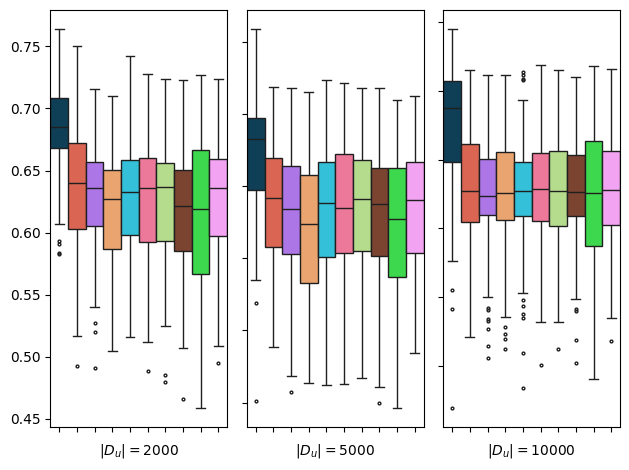

In [156]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    if dn.startswith('n36_gaussian_mixture_d1'):
        return 'CG1'
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(1, 10))

data_list=[]

#for d_n in ['n36_gaussian_mixture_d3','n36_gaussian_mixture_d3_5000','n36_gaussian_mixture_d3_10000']:
for d_n in ['n36_gaussian_mixture_d1','n36_gaussian_mixture_d1_5000','n36_gaussian_mixture_d1_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    #'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']



    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
#sns.boxplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[0])
#sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[1])
#sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[2])
sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)
#sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[1])
#sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[2])
# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')


#plt.suptitle('CG1')

plt.tight_layout()



plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG1.png')

#plt.axis('off')

n36_gaussian_mixture_d2
CG2
2000
data/dataset_n36_gaussian_mixture_d2
n36_gaussian_mixture_d2_5000
CG2
5000
data/dataset_n36_gaussian_mixture_d2_5000
n36_gaussian_mixture_d2_10000
CG2
10000
data/dataset_n36_gaussian_mixture_d2_10000


/tmp/ipykernel_10501/1148086144.py:182: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1148086144.py:183: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1148086144.py:184: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

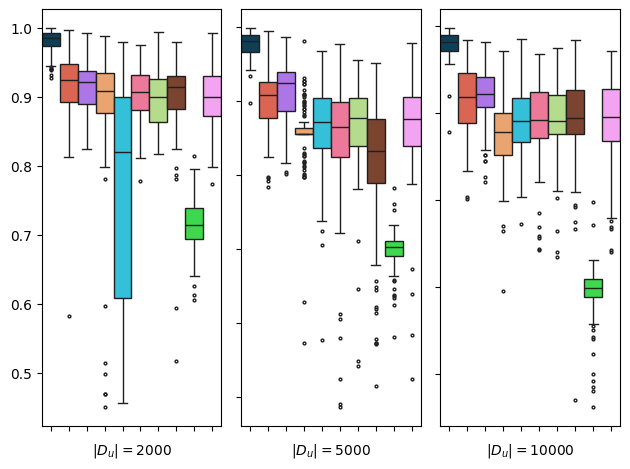

In [149]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    if dn.startswith('n36_gaussian_mixture_d1'):
        return 'CG1'
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

#for d_n in ['n36_gaussian_mixture_d3','n36_gaussian_mixture_d3_5000','n36_gaussian_mixture_d3_10000']:
for d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    #'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']



    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
# sns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[0])
# sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[1])
# sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[2])

sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)

# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.tight_layout()

#plt.suptitle('CG2')
plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG2.png')

#plt.axis('off')

n36_gaussian_mixture_d3
CG3
2000
data/dataset_n36_gaussian_mixture_d3
n36_gaussian_mixture_d3_5000
CG3
5000
data/dataset_n36_gaussian_mixture_d3_5000
n36_gaussian_mixture_d3_10000
CG3
10000
data/dataset_n36_gaussian_mixture_d3_10000


/tmp/ipykernel_10501/2890462553.py:182: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/2890462553.py:183: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/2890462553.py:184: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

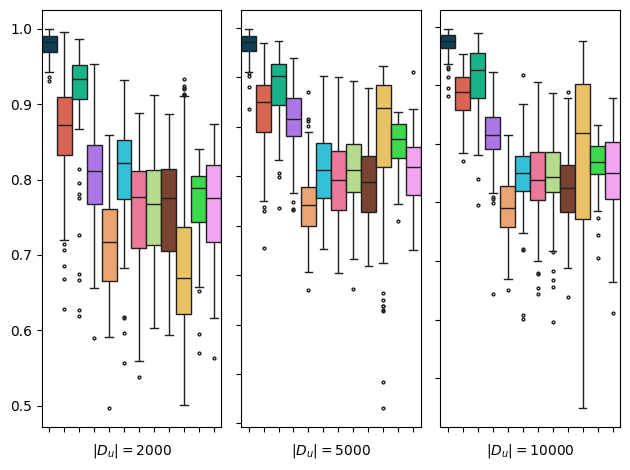

In [150]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

for d_n in ['n36_gaussian_mixture_d3','n36_gaussian_mixture_d3_5000','n36_gaussian_mixture_d3_10000']:
#or d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})
    ma_i=ma_i.rename(columns={'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']


    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
# sns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[0])
# sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[1])
# sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,errcolor = 'gray',ax=axes[2])

sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)

# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.tight_layout()

#@plt.suptitle('CG3')
plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG3.png')


n36_gaussian_mixture_d4
CG4
2000
data/dataset_n36_gaussian_mixture_d4
n36_gaussian_mixture_d4_5000
CG4
5000
data/dataset_n36_gaussian_mixture_d4_5000
n36_gaussian_mixture_d4_10000
CG4
10000
data/dataset_n36_gaussian_mixture_d4_10000


/tmp/ipykernel_10501/1075853418.py:183: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1075853418.py:184: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1075853418.py:185: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

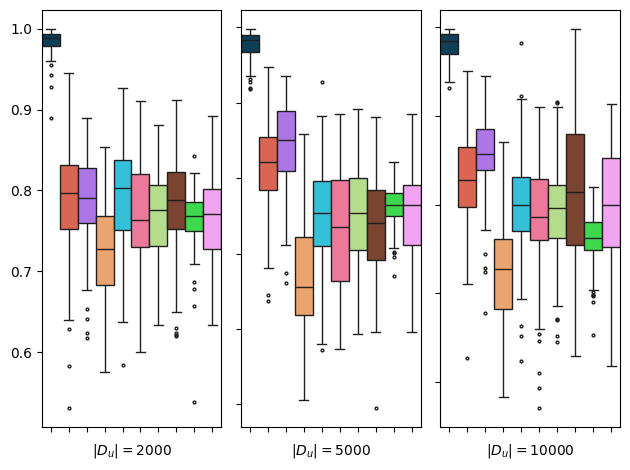

In [151]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    if dn.startswith('n36_gaussian_mixture_d4'):
        return 'CG4'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

for d_n in ['n36_gaussian_mixture_d4','n36_gaussian_mixture_d4_5000','n36_gaussian_mixture_d4_10000']:
#or d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    #'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']



    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
# sns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[0])
# sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[1])
# sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[2])

sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)

# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')


plt.tight_layout()

#plt.suptitle('CG4')
plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG4.png')


n36_gaussian_mixture_d5
CG5
2000
data/dataset_n36_gaussian_mixture_d5
n36_gaussian_mixture_d5_5000
CG5
5000
data/dataset_n36_gaussian_mixture_d5_5000
n36_gaussian_mixture_d5_10000
CG5
10000
data/dataset_n36_gaussian_mixture_d5_10000


/tmp/ipykernel_10501/3486003263.py:188: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/3486003263.py:189: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/3486003263.py:190: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

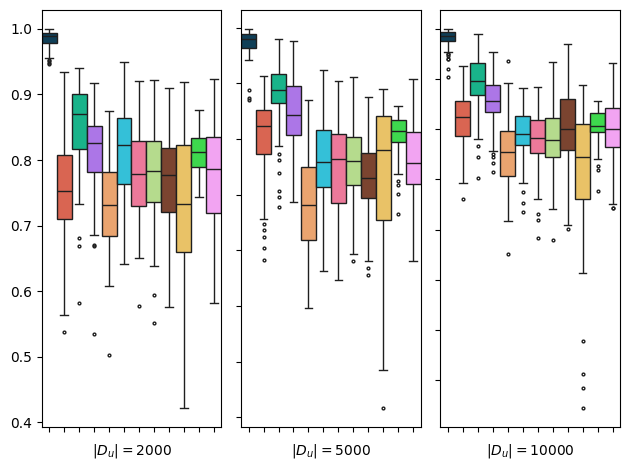

In [152]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    if dn.startswith('n36_gaussian_mixture_d4'):
        return 'CG4'
    if dn.startswith('n36_gaussian_mixture_d5'):
        return 'CG5'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

for d_n in ['n36_gaussian_mixture_d5','n36_gaussian_mixture_d5_5000','n36_gaussian_mixture_d5_10000']:
#or d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})
    ma_i=ma_i.rename(columns={'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']




    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
#s#ns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[0])
#sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[1])
#sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[2])

sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)

# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')

plt.tight_layout()

#plt.suptitle('CG5')
plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG5.png')


n36_gaussian_mixture_d6
None
2000
data/dataset_n36_gaussian_mixture_d6
n36_gaussian_mixture_d6_5000
None
5000
data/dataset_n36_gaussian_mixture_d6_5000
n36_gaussian_mixture_d6_10000
None
10000
data/dataset_n36_gaussian_mixture_d6_10000


/tmp/ipykernel_10501/1084027712.py:187: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1084027712.py:188: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/1084027712.py:189: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

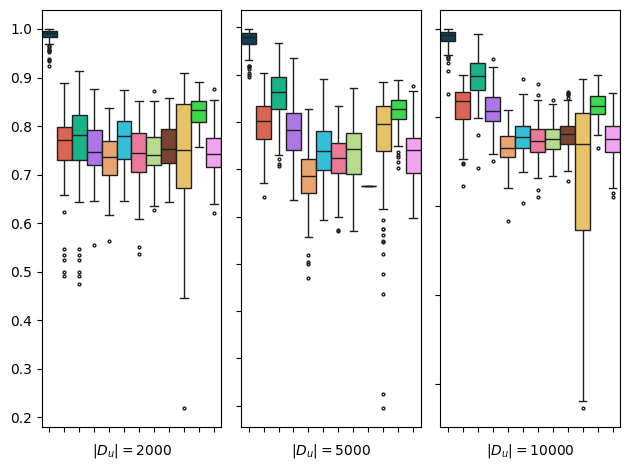

In [153]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    if dn.startswith('n36_gaussian_mixture_d4'):
        return 'CG4'
    if dn.startswith('n36_gaussian_mixture_d5'):
        return 'CG5'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

for d_n in ['n36_gaussian_mixture_d6','n36_gaussian_mixture_d6_5000','n36_gaussian_mixture_d6_10000']:
#or d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})
    ma_i=ma_i.rename(columns={'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']



    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
# sns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[0])
# sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[1])
# sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[2])

sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)

# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')



plt.tight_layout()
#plt.suptitle('CG5')
plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG6.png')


n36_gaussian_mixture_d7
None
2000
data/dataset_n36_gaussian_mixture_d7
n36_gaussian_mixture_d7_5000
None
5000
data/dataset_n36_gaussian_mixture_d7_5000
n36_gaussian_mixture_d7_10000
None
10000
data/dataset_n36_gaussian_mixture_d7_10000


/tmp/ipykernel_10501/996162762.py:184: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/996162762.py:185: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_10501/996162762.py:186: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x1000 with 0 Axes>

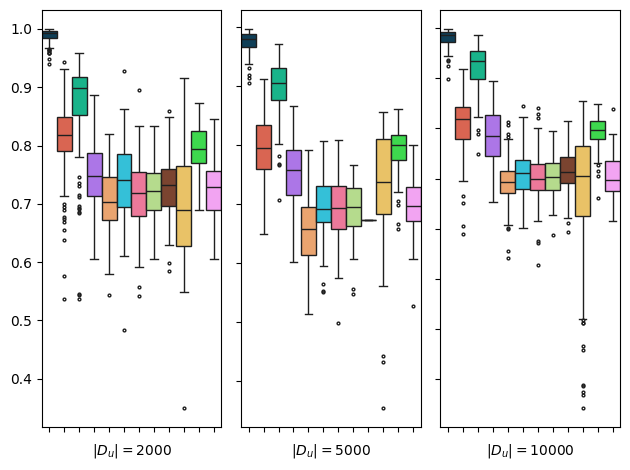

In [154]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')


os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

def get_dnumber_formatted(dn):
    
    if dn.startswith('n36_gaussian_mixture_d2'):
        return 'CG2'
    if dn.startswith('n36_gaussian_mixture_d3'):
        return 'CG3'
    if dn.startswith('n36_gaussian_mixture_d4'):
        return 'CG4'
    if dn.startswith('n36_gaussian_mixture_d5'):
        return 'CG5'
    
    
def get_nu(dn):
    
    if dn.endswith('_5000'):
        return 5000
    
    if dn.endswith('_10000'):
        return 10000
    
    else:
        return 2000
    
    
    
import matplotlib.pyplot as plt
    
# Set the figure size
plt.figure(figsize=(10, 10))

data_list=[]

for d_n in ['n36_gaussian_mixture_d7','n36_gaussian_mixture_d7_5000','n36_gaussian_mixture_d7_10000']:
#or d_n in ['n36_gaussian_mixture_d2','n36_gaussian_mixture_d2_5000','n36_gaussian_mixture_d2_10000']:
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

    #d_n='n36_gaussian_mixture_d2'
    sdir=dspec.loc[d_n].save_folder

    #print('computing for dn: {0}'.format(d_n))
    master_spec=pd.read_excel('/media/krillman/240GB_DATA/codes2/SSL_GCM/combined_spec.xls',sheet_name=None)
    dspec=master_spec['dataset_spec'] #write dataset spec shorthand
    dspec.set_index("d_n",inplace=True) #set idx for easier

    csi=master_spec['dataset_si'][d_n].values
    candidate_si=csi[~np.isnan(csi)]
    candidate_si=[int(c) for c in candidate_si]
    cspec=dspec.loc[d_n] #current spec
    model_accs={}
    all_si=[s for s in candidate_si]
    model_accs['s_i']=all_si



    with NoStdStreams():
        for current_model in model_names_synthetic:
            vaccs=[]
            for s_i in candidate_si:
                try:
                    vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
                except:
                    print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                    vaccs.append(np.mean(vaccs))
            model_accs[current_model]=vaccs
        ma=pd.DataFrame(model_accs)

        for cm in model_names_synthetic:
            ma[cm]=ma[cm].astype(str)

        list_of_plots=[]
        list_of_synthetic_plots=[]
        list_of_mmd=[]

        #get remaining s_i
        remaining_si=[i for i in ma.index]

        for s_i in remaining_si:
            im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
            fpath='../'+sdir+'/'+im_fn
            list_of_plots.append(fpath)
            im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
            list_of_synthetic_plots.append(im_fn)
            #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
            list_of_mmd.append(0)
        
        ma['mmd_diff']=list_of_mmd
        ma['data_plot']=list_of_plots
        ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        
        #ma['data_plot']=list_of_plots
        #ma['synthetic_cgan_data']=list_of_synthetic_plots
        
        #all paths for decision boundary plots
        dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
        
        #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
        for m in model_names_synthetic:
            ma[m]=ma[m]+'|'+dict_of_paths[m]
            
        # style_dict={m:make_clickable_float for m in model_names_synthetic}
        # style_dict.update({'data_plot':make_clickable,
        #                 'synthetic_cgan_data':make_clickable})

        
    os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
    #ma.drop(columns=['s_i'],inplace=True)
    #ma.style.format(style_dict)
    #ma

    #violin plots for model performamces
    ma_i=copy.deepcopy(ma)
    ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})
    ma_i=ma_i.rename(columns={'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


    model_names = ['FULLY_SUPERVISED_CLASSIFIER',
                'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',
                'VAT',
                'TRIPLE_GAN',
                'SSL_GAN',
                'SSL_VAE',
                'ENTROPY_MINIMISATION',
                    'LABEL_PROPAGATION',
                    'ASSFSCMR',
                'SFAMCAMT',
                'PARTIAL_SUPERVISED_CLASSIFIER']



    ma_i=ma_i[model_names]

    for m in model_names:
        ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
        
        
    #get colours


    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd


    ma_ii=ma_i.transpose().reset_index(drop=False)
    
    
    ma_ii['model']=ma_ii['index']
    ma_ii=ma_ii.drop(columns='index')
    long_data = pd.melt(ma_ii, id_vars=['model'], var_name='Performance', value_name='Value')

    long_data=long_data.drop(columns=['Performance'])
    long_data['d_n']=get_dnumber_formatted(d_n)
    long_data['n_u']=get_nu(d_n)
    long_data.Value=long_data.Value.astype(float)
    
    
    
    
    print(d_n)
    
    print(get_dnumber_formatted(d_n))
    print(get_nu(d_n))
    print(sdir)
    
    
    data_list.append(long_data)
    
    
    
    
fig, axes = plt.subplots(1, 3)
#axes = axes.flatten()
    
    
sns.boxplot(data_list[0], x="model", y="Value",palette=colours_dict,width=1,ax=axes[0],fliersize=2)
sns.boxplot(data_list[1], x="model", y="Value",palette=colours_dict,width=1,ax=axes[1],fliersize=2)
sns.boxplot(data_list[2], x="model", y="Value",palette=colours_dict,width=1,ax=axes[2],fliersize=2)
    
# sns.barplot(data_list[0], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[0])
# sns.barplot(data_list[1], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[1])
# sns.barplot(data_list[2], x="model", y="Value", errorbar="sd",palette=colours_dict,width=1,err_kws={'color': 'gray'},ax=axes[2])



# Turn off x-axis labels
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[2].set_xticklabels([])
# Turn off y-axis labels
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])

# Optionally, you can also hide the axis labels (not the tick labels)
# Optionally, you can also hide the axis labels (not the tick labels)
axes[0].set_xlabel('$|D_u|=2000$')
axes[1].set_xlabel('$|D_u|=5000$')
axes[2].set_xlabel('$|D_u|=10000$')

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')


#plt.suptitle('CG7')
plt.tight_layout()

plt.savefig('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/all_synthetic_CG7.png')


In [77]:
# Sort the DataFrame by 'Values'
sorted_data = data.sort_values('Values', ascending=False)

# Create a barplot with specified order
sns.barplot(x='Category', y='Values', data=data, order=sorted_data['Category'])

# Show the plot
sns.plt.show()

index Performance  Value  d_n    n_u
2200       FULLY_SUPERVISED_CLASSIFIER           0    NaN  CG2  10000
2201  CGAN_BASIC_SUPERVISED_CLASSIFIER           0    NaN  CG2  10000
2202                               VAT           0    NaN  CG2  10000
2203                        TRIPLE_GAN           0    NaN  CG2  10000
2204                           SSL_GAN           0    NaN  CG2  10000
...                                ...         ...    ...  ...    ...
3295              ENTROPY_MINIMISATION          99    NaN  CG2  10000
3296                 LABEL_PROPAGATION          99    NaN  CG2  10000
3297                          ASSFSCMR          99    NaN  CG2  10000
3298                          SFAMCAMT          99    NaN  CG2  10000
3299     PARTIAL_SUPERVISED_CLASSIFIER          99    NaN  CG2  10000

[1100 rows x 5 columns]

In [36]:
long_data

model  Value  d_n   n_u
0           FULLY_SUPERVISED_CLASSIFIER  0.994  CG2  2000
1      CGAN_BASIC_SUPERVISED_CLASSIFIER  0.949  CG2  2000
2     CGAN_GUMBEL_SUPERVISED_CLASSIFIER    NaN  CG2  2000
3                                   VAT  0.898  CG2  2000
4                            TRIPLE_GAN  0.893  CG2  2000
...                                 ...    ...  ...   ...
1195               ENTROPY_MINIMISATION  0.875  CG2  2000
1196                  LABEL_PROPAGATION  0.842  CG2  2000
1197                           ASSFSCMR    NaN  CG2  2000
1198                           SFAMCAMT  0.713  CG2  2000
1199      PARTIAL_SUPERVISED_CLASSIFIER  0.870  CG2  2000

[1200 rows x 4 columns]

/tmp/ipykernel_10501/3774795246.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




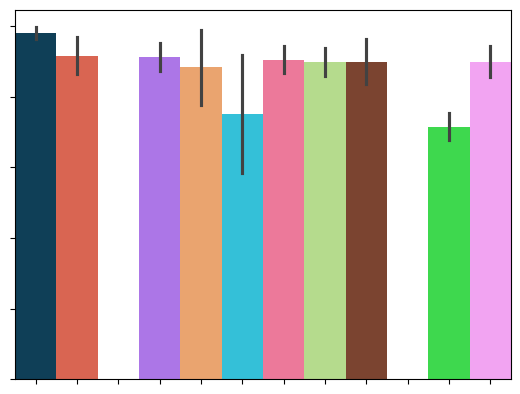

In [38]:
long_data.head(1000)

index Performance  Value
0         FULLY_SUPERVISED_CLASSIFIER           0  0.994
1    CGAN_BASIC_SUPERVISED_CLASSIFIER           0  0.949
2                                 VAT           0  0.898
3                          TRIPLE_GAN           0  0.893
4                             SSL_GAN           0  0.738
..                                ...         ...    ...
995                           SSL_VAE          90  0.973
996              ENTROPY_MINIMISATION          90  0.959
997                 LABEL_PROPAGATION          90  0.950
998                          ASSFSCMR          90    NaN
999                          SFAMCAMT          90  0.700

[1000 rows x 3 columns]

### d3: n36

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d3'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})

model_names_d3 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)



#fig.update_layout(legend=dict(font=dict(size= 20)))#

#fig.update_layout(legend= {'itemsizing': 'constant'})#,marker={'size':100}))

#fig.update_layout(
#    width=5000,
#    height=2500)

fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g3.png")

#fig = go.Figure(data=data, layout=layout)

fig.show()


### Accuracy (unlabelled)

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d3'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)

#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})

model_names_d3 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)



#fig.update_layout(legend=dict(font=dict(size= 20)))#

#fig.update_layout(legend= {'itemsizing': 'constant'})#,marker={'size':100}))

#fig.update_layout(
#    width=5000,
#    height=2500)

fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g3.png",scale=5)

#fig = go.Figure(data=data, layout=layout)

fig.show()



### d4: n36

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d4'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si


with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

os.chdir('jp')
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d4 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
               'PARTIAL_SUPERVISED_CLASSIFIER']



ma_i=ma_i[model_names_d4]
ma_i=ma_i.astype(float)


fig = go.Figure()
for m in model_names_d4:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g4.png")



### Accuracy (unlabelled)

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d4'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si


with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

os.chdir('jp')
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d4 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
               'PARTIAL_SUPERVISED_CLASSIFIER']



ma_i=ma_i[model_names_d4]
ma_i=ma_i.astype(float)


fig = go.Figure()
for m in model_names_d4:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g4.png",scale=5)




### d5: n36

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d5'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g5.png")





### Accuracy (unlabelled)

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d5'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)

#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g5.png",scale=5)








### d6: n36

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d6'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



#model_names_synthetic.insert(3,'CGAN_GUMBEL_DJ_XCES_SUPERVISED_CLASSIFIER')


with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})



ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g6.png")





### Accuracy (unlabelled)

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d6'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



#model_names_synthetic.insert(3,'CGAN_GUMBEL_DJ_XCES_SUPERVISED_CLASSIFIER')


with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})



ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g6.png",scale=5)






### d7: n36

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d7'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g7.png")




### Accuracy (unlabelled)

In [ ]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

d_n='n36_gaussian_mixture_d7'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g7.png",scale=5)





# Collating Real Data Results

## Sachs: RAF

In [14]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='real_sachs_raf_log'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


In [15]:
ma.CGAN_GUMBEL_SUPERVISED_CLASSIFIER.astype(float).values.mean()

0.76828016102314

In [1]:
ma.sort_values(by=3)

NameError: name 'ma' is not defined

In [229]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))



#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/real_boxplot_ulab_acc_sachs_raf.png",scale=5)


## Sachs: MEK

In [7]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='real_sachs_mek_log'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


In [ ]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("../causal_ssl_gan_paper/images/real_boxplot/ulab_acc_sachs_mek.png",scale=5)




## Bcancer Wisconsin: ZScore

In [11]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='real_bcancer_diagnosis_zscore'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)







In [12]:
ma.CGAN_GUMBEL_SUPERVISED_CLASSIFIER.astype(float).values.mean()

0.9274129152297974

In [9]:
ma.PARTIAL_SUPERVISED_CLASSIFIER.astype(float).values.mean()


0.9191542279720306

In [17]:
ma.CGAN_BASIC_SUPERVISED_CLASSIFIER.astype(float).values.mean()


0.9381343299150466

In [21]:
np.argsort(ma.CGAN_GUMBEL_SUPERVISED_CLASSIFIER.astype(float).values)#.sort()

array([51, 10, 41, 77, 27, 37, 31, 92, 30, 14, 66,  2, 96, 90, 94, 25, 71,
       44, 56, 39, 69, 40, 21, 38,  3, 61, 46,  7, 13, 22, 75, 59, 78,  0,
       99,  8, 19, 67, 36, 82, 32, 76, 12, 17, 50,  1, 57,  4, 85,  9, 87,
       84, 28, 24, 47, 95, 89, 20,  5, 62, 68, 58, 23, 33, 91, 16, 98, 48,
       97, 60, 43, 83, 70, 93, 86, 11, 79, 18, 55, 26, 34, 81, 73, 42, 65,
       35, 63, 29, 74, 49, 88, 15,  6, 64, 54, 52, 80, 72, 45, 53])

In [231]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

fig.update_layout(yaxis_range=[0.65,1])

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
#fig.write_image("../causal_ssl_gan_paper/images/real_boxplot/ulab_acc_bcancer_diagnosis_zscore.png",scale=5)
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/real_boxplot_ulab_acc_bcancer_diagnosis_zscore.png",scale=5)




# Example output for illustrating Van Kleugen et al (2019) conditional cluster assumption

In [ ]:
#from sklearn import datasets

In [ ]:
import sklearn
import numpy as np
import scipy
import pandas as pd
import copy
import plotly.express as px
import plotly.graph_objects as go


#c1 = np.random.normal(0, 0.5, 1000)


def return_norm_samples(class_label,n=100):
    if class_label==0:
        return(np.random.normal(-2, 0.5, n))
    if class_label==1:
        return(np.random.normal(2, 0.5, n))



#get our Y class label:

vank_example=pd.DataFrame([0]*1000 + [1]*1000)
vank_example.columns=['Y']
vank_example['X_C']=[return_norm_samples(y,1)[0] for y in vank_example['Y']]
vank_example['X_E']=[return_norm_samples(np.fmod(y+1,2),1)[0] for y in vank_example['Y']]


vank_example['Y']=vank_example['Y'].astype(str)
#px.histogram(return_norm_samples(1))

#make copy
vo=copy.deepcopy(vank_example)
vc=copy.deepcopy(vank_example)
vc['X_E']=-vc['X_E']
vc['Y']='0'
px.scatter(vc, x=vc.X_C, y=vc.X_E, color=vc.Y)


vank_example['Y']='1'


g_df=pd.concat([vc,vank_example])

#px.scatter(vank_example, x=g_df.X_C, y=g_df.X_E, color=g_df.Y)
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=vc.X_C, y=vc.X_E,
                    mode='markers',
                    name='',marker_color='red',marker_symbol='circle'))
# Add traces
fig.add_trace(go.Scatter(x=vo.X_C, y=vo.X_E,
                    mode='markers',
                    name='',marker_color='blue',marker_symbol='circle'))





fig.add_trace(go.Scatter(x=[-4,4],y=[4, -4],mode="lines",line=go.scatter.Line(color="blue"),showlegend=False))

fig.add_trace(go.Scatter(x=[-4,4],y=[-4, 4],mode="lines",line=go.scatter.Line(color="red"),showlegend=False))


fig.update_layout(showlegend=False)
fig.update_layout(
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)',
    xaxis_title=r'$\Huge X_C$',
    yaxis_title=r'$\Huge X_E$')


fig.update_layout(title_text="",
        paper_bgcolor='rgba(255,255,255,1)',\
    plot_bgcolor='rgba(255,255,255,1)',\
                  title_font_size=30)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
#fig.update_xaxes(zeroliene=True),#minor=dict(showgrid=False))
#fig.update_yaxes(minor_ticks="inside")






fig.update_layout(
    # on the y-axis
    yaxis_ticksuffix=r"$",
    yaxis_tickprefix=r"$\Huge ",
    xaxis_ticksuffix=r"$",
    xaxis_tickprefix=r"$\Huge ",
    yaxis_showticksuffix="all"  # or "first" or "last"
)

fig.update_xaxes(ticks="outside")
fig.update_yaxes(ticks="outside")

fig.update_yaxes( title_standoff = 25)



fig.write_image('../causal_ssl_gan_paper/images/vank_ssl_xe_xc.png', scale=5)



fig = go.Figure()
#fig.add_trace(go.Histogram(x=vc.X_E))
#fig.add_trace(go.Histogram(x=vo.X_E))

fig.layout.legend.tracegroupgap = 200


fig.add_trace(go.Histogram(
    histnorm='percent',
    x=vc.X_E,

    name=r'$\Huge Y=1\\\\$', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-4.0,
        end=4,
        size=0.05
    ),
    marker_color='red',
    opacity=0.5
)         
        
             )


fig.add_trace(go.Histogram(
    histnorm='percent',
    x=vo.X_E,
    name=r'$ \Huge  Y=0\\\\$', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-4.0,
        end=4,
        size=0.05
    ),
    marker_color='blue',
    opacity=0.5
))


# Overlay both histograms
fig.update_xaxes(rangeselector_font=dict(size=100))

fig.update_layout(barmode='overlay')
fig.update_layout(xaxis_title=r'$\Huge X$')
fig.update_layout(yaxis_title=r'$\Huge P(X)$')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')


# update_layout method used to modify change and size
#fig.update_layout(legend=dict(font=dict(size= 1)))

fig.update_layout(
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(255,255,255,1)')


fig.update_layout(
    # on the y-axis
    yaxis_ticksuffix=r"$",
    yaxis_tickprefix=r"$\Huge ",
    xaxis_ticksuffix=r"$",
    xaxis_tickprefix=r"$\Huge ",
    yaxis_showticksuffix="all"  # or "first" or "last"
)

fig.update_xaxes(ticks="outside")
fig.update_yaxes(ticks="outside")

fig.update_yaxes( title_standoff = 25)


fig.write_image('../causal_ssl_gan_paper/images/vank_ssl_xe_hist.png', scale=5)


#fig.show()

In [ ]:
fig.show()

# Results table formatting: Pandas -> Latek with auto bold for highest value

13_01_2023

In [ ]:
# https://stackoverflow.com/questions/65070070/highlight-the-best-value-of-each-row-in-python-pandas-to-latex

from functools import partial

import pandas as pd
import numpy as np
import os
os.makedirs('latek_fiddling',exist_ok=True)

def bold_formatter(x, value):
    """Format a number in bold when (almost) identical to a given value.
    
    Args:
        x: Input number.
        
        value: Value to compare x with.
        
        num_decimals: Number of decimals to use for output format.

    Returns:
        String converted output.

    """
    # Consider values equal, when rounded results are equal
    # otherwise, it may look surprising in the table where they seem identical
    if round(x, num_decimals) == round(value, num_decimals):
        return f"\\textbf{{{x}}}"
    else:
        return x


    
drop_idx=['n','psup_baseline']
def get_colmax(in_col,drop_idx=drop_idx):
    #takes in_col as pd series (column) and returns the max value when interpreted as value+-error
    #drop some columns...
    in_values=in_col.drop(drop_idx).values
    values=[v.split(' ± ')[0] for v in in_values]
    values=[float(v) for v in values]
    values=np.array(values)
    max_idx=np.argmax(values)
    max_instance=in_values[max_idx]
    return(max_instance)


fmt_bold_max = {column: partial(bold_formatter, value=get_colmax(df[column])) for column in max_columns_2f}
fmts = dict(**fmt_bold_max)

with open("latek_fiddling/test_table.tex", "w") as fh:
    df.to_latex(buf=fh,
                index=False,
                header=col_names,
                formatters=fmts,
                escape=False)

In [ ]:



value = return_colmax_str(df[column])

# takes pandas  series ie df[column] =and then converts back to float and then returns the max value
# as string including error bars



In [ ]:


def format_w_error(mean,std):
    retval='{:.3f} ± {:.3f}'.format(mean * 100,std* 100)
    return(retval)


    


In [ ]:
import numpy as np

mv=np.random.rand(10)
sv=np.random.rand(10)


vals=[format_w_error(m,s) for m,s in zip(mv,sv)]
max_val=get_colmax(pd.Series(vals))

print(max_val)
vals

# 10000

# Collate Synthetic retrials for 10000,100000 unlabelled

## 10,000

### d1

In [157]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d1_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['mmd_diff']=list_of_mmd
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on test data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    
    
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')       
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [158]:
#box plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d1 = ['FULLY_SUPERVISED_CLASSIFIER',
                  'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
                    'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d1]

for m in model_names_d1:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]

fig = go.Figure()
for m in model_names_d1:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#        source='causal_graphs/cg1.png',
#        x=0.7,
#        y=1,
#        )
#)


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g1_10000.png")



### Accuracy (unlabelled)

In [160]:

#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d1_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['mmd_diff']=list_of_mmd
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    
    
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')       
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#box plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})


model_names_d1 = ['FULLY_SUPERVISED_CLASSIFIER',
                  'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
               'LABEL_PROPAGATION',
                               #'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d1]

for m in model_names_d1:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]

fig = go.Figure()
for m in model_names_d1:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#        source='causal_graphs/cg1.png',
#        x=0.7,
#        y=1,
#        )
#)


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g1_10000.png",scale=5)
#fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g1_10000.png")



### d2: n36

In [161]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d2_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
     
    ma['mmd_diff']=list_of_mmd
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    
    #ma['data_plot']=list_of_plots
    #ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on test data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
ma.drop(columns=['s_i'],inplace=True)





ma.sort_values(by=list(ma.columns)[1],inplace=True)



ma.style.format(style_dict)
#ma

In [162]:
#rel_dn

#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d2_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
     
    ma['mmd_diff']=list_of_mmd
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    
    #ma['data_plot']=list_of_plots
    #ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on test data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
ma.drop(columns=['s_i'],inplace=True)





ma.sort_values(by=list(ma.columns)[1],inplace=True)



ma.style.format(style_dict)
#ma

#### Violin Plots

In [223]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})



model_names_d2 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d2]

for m in model_names_d2:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
    
    
#get colours



fig = go.Figure()
for m in model_names_d2:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#fig.update_yaxes(range=list(...))
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g2_10000.png")


### Accuracy (unlabelled)

In [224]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d2_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_mmd=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        #list_of_mmd.append(get_mmd_dist(sdir,d_n,s_i,dspec))
        list_of_mmd.append(0)
     
    ma['mmd_diff']=list_of_mmd
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    
    #ma['data_plot']=list_of_plots
    #ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    
    #split into performance on ulab data, and path to the decision boundary plot, separated by '|' as delimiter
    for m in model_names_synthetic:
        ma[m]=ma[m]+'|'+dict_of_paths[m]
        
    style_dict={m:make_clickable_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

    
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')      
#os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)
#ma

#violin plots for model performamces
ma_i=copy.deepcopy(ma)
ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})



model_names_d2 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                #'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names_d2]

for m in model_names_d2:
    ma_i[m]=[float(result.split('|')[0]) for result in ma_i[m]]
    
    
#get colours



fig = go.Figure()
for m in model_names_d2:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#fig.update_yaxes(range=list(...))
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g2_10000.png",scale=5)
#fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g2_10000.png")


### d3: n36

In [166]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d3_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)



ma.sort_values(by='CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER',inplace=True,ascending=False)



ma.style.format(style_dict)


#### Violin Plots

In [167]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})

model_names_d3 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)



#fig.update_layout(legend=dict(font=dict(size= 20)))#

#fig.update_layout(legend= {'itemsizing': 'constant'})#,marker={'size':100}))

#fig.update_layout(
#    width=5000,
#    height=2500)

fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g3_10000.png")

#fig = go.Figure(data=data, layout=layout)

fig.show()


### Accuracy (unlabelled)

In [190]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d3_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)

#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})

model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)



#fig.update_layout(legend=dict(font=dict(size= 20)))#

#fig.update_layout(legend= {'itemsizing': 'constant'})#,marker={'size':100}))

#fig.update_layout(
#    width=5000,
#    height=2500)

fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g3_10000.png",scale=5)

#fig = go.Figure(data=data, layout=layout)

fig.show()



### d4: n36

In [209]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d4_10000'
sdir=dspec.loc[d_n].save_folder











model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER',
                #'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']



#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})



os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  


    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [200]:
ma_i

FULLY_SUPERVISED_CLASSIFIER CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER  \
0           0.9970029592514038                  0.8741258382797241   
1           0.9910000562667847                  0.8320000171661377   
2           0.9900000691413879                  0.7850000262260437   
3           0.9760000705718994                  0.8210000395774841   
4           0.9540000557899475                  0.8440000414848328   
..                         ...                                 ...   
95          0.9860000610351562                  0.8320000171661377   
96          0.9770000576972961                  0.8810000419616699   
97          0.9910000562667847                  0.8560000658035278   
98          0.9920079708099365                  0.8661338686943054   
99          0.9930069446563721                  0.7622377276420593   

                   VAT          TRIPLE_GAN             SSL_GAN  \
0   0.8061937689781189  0.6823176741600037  0.7502497434616089   
1   0.8950000405311584  0.7400000095367432  0.9160000681877136   
2   0.6810000538825989  0.5790000557899475  0.5690000057220459   
3   0.8070000410079956  0.7630000114440918  0.8250000476837158   
4     0.89000004529953  0.8670000433921814  0.8990000486373901   
..                 ...                 ...                 ...   
95   0.854426786842116  0.7261969791837489  0.7973009879330556   
96  0.8544267868421165  0.7261969791837486  0.7973009879330556   
97  0.8544267868421165  0.7261969791837487  0.7973009879330556   
98  0.8544267868421164  0.7261969791837487  0.7973009879330556   
99  0.8544267868421164  0.7261969791837488  0.7973009879330556   

               SSL_VAE ENTROPY_MINIMISATION   LABEL_PROPAGATION ASSFSCMR  \
0   0.6003996133804321   0.7442557215690613  0.7522477507591248      nan   
1   0.8720000386238098   0.8270000219345093  0.8679999709129333      nan   
2   0.6920000314712524   0.5940000414848328  0.5989999771118164      nan   
3   0.7950000166893005   0.8580000400543213  0.8759999871253967      nan   
4   0.8950000405311584   0.8140000104904175  0.9240000247955322      nan   
..                 ...                  ...                 ...      ...   
95  0.7831363046025656   0.7932522720601183  0.8134869904052922      nan   
96  0.7831363046025657   0.7932522720601186  0.8134869904052918      nan   
97  0.7831363046025657   0.7932522720601185  0.8134869904052919      nan   
98  0.7831363046025657   0.7932522720601185  0.8134869904052919      nan   
99  0.7831363046025657   0.7932522720601185  0.8134869904052919      nan   

   SFAMCAMT PARTIAL_SUPERVISED_CLASSIFIER  \
0       nan             0.710289716720581   
1       nan            0.8300000429153442   
2       nan            0.6720000505447388   
3       nan            0.8660000562667847   
4       nan            0.8870000243186951   
..      ...                           ...   
95      nan            0.8330000638961792   
96      nan            0.8020000457763672   
97      nan            0.7450000643730164   
98      nan            0.8451548218727112   
99      nan            0.7512487173080444   

                                            data_plot  \
0   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
1   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
2   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
3   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
4   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
..                                                ...   
95  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
96  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
97  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
98  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
99  ../data/dataset_n36_gaussian_mixture_d4_10000/...   

                                  synthetic_cgan_data  
0   ../data/dataset_n36_gaussian_mixture_d4_10000/...  
1   ../data/dataset_n36_gaussian_mixture_d4_10000/...  
2   ../data/dataset_n36_gaussian_mixture_d4_10000/...  
3   ..

In [211]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)



model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']



ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g4_10000.png")



### Accuracy (unlabelled)

In [207]:
ma_i

s_i FULLY_SUPERVISED_CLASSIFIER CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER  \
0     0          0.9914999604225159                  0.8754000067710876   
1     1          0.9922999739646912                  0.8366000056266785   
2     2          0.9896999597549438                  0.7989999651908875   
3     3          0.9829999804496765                   0.825499951839447   
4     4          0.9587999582290649                   0.847000002861023   
..  ...                         ...                                 ...   
95   95          0.9835000038146973                  0.8276000022888184   
96   96          0.9829999804496765                  0.8865999579429626   
97   97           0.986299991607666                  0.8503999710083008   
98   98          0.9953999519348145                  0.8682000041007996   
99   99          0.9972999691963196                  0.7666999697685242   

                   VAT          TRIPLE_GAN             SSL_GAN  \
0   0.8036999702453613  0.6626999974250793  0.7300999760627747   
1   0.8847999572753906  0.7393999695777893  0.9114999771118164   
2   0.7281999588012695  0.6161999702453613  0.6234999895095825   
3   0.8021999597549438  0.7579999566078186  0.8057000041007996   
4   0.9010999798774719  0.8704999685287476  0.9186999797821045   
..                 ...                 ...                 ...   
95  0.8570276908127662   0.727440947509674  0.8000578097550269   
96  0.8570276908127658  0.7274409475096738  0.8000578097550265   
97  0.8570276908127659  0.7274409475096738  0.8000578097550266   
98  0.8570276908127659  0.7274409475096738  0.8000578097550266   
99   0.857027690812766  0.7274409475096739  0.8000578097550267   

               SSL_VAE ENTROPY_MINIMISATION   LABEL_PROPAGATION  \
0   0.5927000045776367   0.7501999735832214   0.729200005531311   
1   0.8848999738693237   0.8247999548912048   0.878600001335144   
2   0.7313999533653259   0.6453999876976013  0.6570000052452087   
3   0.7960000038146973   0.8532999753952026  0.8632000088691711   
4   0.9023000001907349   0.8162999749183655  0.9283999800682068   
..                 ...                  ...                 ...   
95   0.785656607294657   0.7961638368755937  0.8144451219861102   
96  0.7856566072946571    0.796163836875594  0.8144451219861099   
97  0.7856566072946571    0.796163836875594  0.8144451219861099   
98  0.7856566072946571   0.7961638368755939    0.81444512198611   
99   0.785656607294657   0.7961638368755939    0.81444512198611   

              ASSFSCMR            SFAMCAMT PARTIAL_SUPERVISED_CLASSIFIER  \
0   0.3043000102043152  0.7529000043869019            0.6890999674797058   
1    0.659500002861023  0.7468000054359436            0.8331999778747559   
2   0.7685999870300293  0.7383999824523926            0.7294999957084656   
3   0.7131999731063843  0.7414999604225159            0.8636999726295471   
4   0.8058000206947327  0.7949000000953674            0.8884999752044678   
..                 ...                 ...                           ...   
95  0.5634999871253967  0.6532999873161316            0.8359999656677246   
96  0.7170000076293945   0.786899983882904            0.7990999817848206   
97  0.6636000275611877   0.762499988079071            0.7261999845504761   
98   0.598800003528595  0.7339999675750732            0.8610999584197998   
99   0.633899986743927  0.7913999557495117            0.7479999661445618   

                                            data_plot  \
0   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
1   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
2   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
3   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
4   ../data/dataset_n36_gaussian_mixture_d4_10000/...   
..                                                ...   
95  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
96  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
97  ../data/dataset_n36_gaussian_mixture_d4_10000/...   
98  ../data/dataset_n3

In [212]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d4_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


with NoStdStreams():
    for current_model in model_names:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names }
    

    style_dict={}
    style_dict={m:make_float for m in model_names}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable})

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  


    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER'})






model_names_d4 = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']



ma_i=ma[model_names_d4]
ma_i=ma_i.astype(float)


fig = go.Figure()
for m in model_names_d4:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))

#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)
#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g4_10000.png",scale=5)




### d5: n36

In [213]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM')

d_n='n36_gaussian_mixture_d5_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [215]:
model_names

['FULLY_SUPERVISED_CLASSIFIER',
 'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER',
 'VAT',
 'TRIPLE_GAN',
 'SSL_GAN',
 'SSL_VAE',
 'ENTROPY_MINIMISATION',
 'LABEL_PROPAGATION',
 'ASSFSCMR',
 'SFAMCAMT',
 'PARTIAL_SUPERVISED_CLASSIFIER']

In [174]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})






ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g5_10000.png")





### Accuracy (unlabelled)

In [216]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM')

d_n='n36_gaussian_mixture_d5_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)

#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']

ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g5_10000.png",scale=5)








### d6: n36

In [217]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d6_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



#model_names_synthetic.insert(3,'CGAN_GUMBEL_DJ_XCES_SUPERVISED_CLASSIFIER')


with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [178]:
model_names

['FULLY_SUPERVISED_CLASSIFIER',
 'CGAN_BASIC_SUPERVISED_CLASSIFIER',
 'VAT',
 'TRIPLE_GAN',
 'SSL_GAN',
 'SSL_VAE',
 'ENTROPY_MINIMISATION',
 'LABEL_PROPAGATION',
 'SFAMCAMT',
 'PARTIAL_SUPERVISED_CLASSIFIER']

In [218]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


model_names = ['FULLY_SUPERVISED_CLASSIFIER',
               'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                'CGAN_GUMBEL_SUPERVISED_CLASSIFIER',  
               'VAT',
               'TRIPLE_GAN',
               'SSL_GAN',
               'SSL_VAE',
               'ENTROPY_MINIMISATION',
                'LABEL_PROPAGATION',
                                'ASSFSCMR',
               'SFAMCAMT',
               'PARTIAL_SUPERVISED_CLASSIFIER']


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g6_10000.png")





### Accuracy (unlabelled)

In [219]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d6_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si



#model_names_synthetic.insert(3,'CGAN_GUMBEL_DJ_XCES_SUPERVISED_CLASSIFIER')


with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})



ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g6_10000.png",scale=5)






### d7: n36

In [220]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d7_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_test(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
ma.drop(columns=['s_i'],inplace=True)
ma.style.format(style_dict)


#### Violin Plots

In [221]:
#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/test_acc_g7_10000.png")




### Accuracy (unlabelled)

In [222]:
#rel_dn

os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/')

d_n='n36_gaussian_mixture_d7_10000'
sdir=dspec.loc[d_n].save_folder

#print('computing for dn: {0}'.format(d_n))
master_spec=pd.read_excel('combined_spec.xls',sheet_name=None)
dspec=master_spec['dataset_spec'] #write dataset spec shorthand
dspec.set_index("d_n",inplace=True) #set idx for easier

csi=master_spec['dataset_si'][d_n].values
candidate_si=csi[~np.isnan(csi)]
candidate_si=[int(c) for c in candidate_si]
cspec=dspec.loc[d_n] #current spec
model_accs={}
all_si=[s for s in candidate_si]
model_accs['s_i']=all_si




with NoStdStreams():
    for current_model in model_names_synthetic:
        vaccs=[]
        for s_i in candidate_si:
            try:
                vaccs.append(float(get_acc_ulab(dspec.save_folder.loc[d_n],s_i,current_model)))
            except:
                print('warning error for s_i: {0} and model: {1}'.format(s_i,current_model))
                vaccs.append(np.mean(vaccs))
        model_accs[current_model]=vaccs
    ma=pd.DataFrame(model_accs)

    for cm in model_names_synthetic:
        ma[cm]=ma[cm].astype(str)

    list_of_plots=[]
    list_of_synthetic_plots=[]
    list_of_synthetic_gumbel_plots=[]

    #get remaining s_i
    remaining_si=[i for i in ma.index]

    for s_i in remaining_si:
        im_fn=f'data_for_train_d_n_{d_n}_s_i_{s_i}_plot.png'
        fpath='../'+sdir+'/'+im_fn
        list_of_plots.append(fpath)
        im_fn=f'../{sdir}/synthetic_data/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'
        list_of_synthetic_plots.append(im_fn)
        im_fn=f'../{sdir}/synthetic_data_gumbel/synthetic_data_d_n_{d_n}_s_i_{s_i}_plot.png'

        list_of_synthetic_gumbel_plots.append(im_fn)
        
    ma['data_plot']=list_of_plots
    ma['synthetic_cgan_data']=list_of_synthetic_plots
    ma['synthetic_gumbel_cgan_data']=list_of_synthetic_gumbel_plots
    
    
    #all paths for decision boundary plots
    dict_of_paths={m:[get_soft_db_path(m,d_n,s_i,sdir) for s_i in remaining_si] for m in model_names_synthetic }
    

    style_dict={}
    style_dict={m:make_float for m in model_names_synthetic}
    style_dict.update({'data_plot':make_clickable,
                      'synthetic_cgan_data':make_clickable,
                      'synthetic_gumbel_cgan_data':make_clickable})
os.chdir('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results')  
    
#ma.drop(columns=['s_i'],inplace=True)
#ma.style.format(style_dict)


#violin plots for model performamces
ma_i=copy.deepcopy(ma)

ma_i=ma_i.rename(columns={'CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER':'CGAN_BASIC_SUPERVISED_CLASSIFIER',
                        'CGAN_GUMBEL_DJ_SUPERVISED_CLASSIFIER':'CGAN_GUMBEL_SUPERVISED_CLASSIFIER'})


ma_i=ma_i[model_names]
ma_i=ma_i.astype(float)

fig = go.Figure()
for m in model_names:
    fig.add_trace(go.Box(x=[m]*ma_i.shape[0],
                            y=ma_i[m],
                            name=m,
                        fillcolor=colours_dict[m],
                        marker_color="black"))


#fig.add_layout_image(dict(
#    source='causal_graphs/cg2.png',
#    x=0.7,
#    y=1,
#    )
#)

#ig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Accuracy')
fig.update_xaxes(showticklabels=False)

fig.update_layout(showlegend=False)

fig.show()
fig.write_image("/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/images/ulab_acc_g7_10000.png",scale=5)





# RSYNC COMMANDS FOR OLD RESULTS

In [ ]:
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d1_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d2_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d2_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d3_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d4_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d4_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d5_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d5_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d6_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d6_10000/saved_models/
rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d7_10000/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d7_10000/saved_models/


In [184]:
model_names

['FULLY_SUPERVISED_CLASSIFIER',
 'CGAN_BASIC_SUPERVISED_CLASSIFIER',
 'VAT',
 'TRIPLE_GAN',
 'SSL_GAN',
 'SSL_VAE',
 'ENTROPY_MINIMISATION',
 'LABEL_PROPAGATION',
 'SFAMCAMT',
 'PARTIAL_SUPERVISED_CLASSIFIER']

In [2]:
template_str='rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_{ds}/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{ds}/saved_models/'

#rsync without u willl overwrite file



dsets_list=["n36_gaussian_mixture_d1",
"n36_gaussian_mixture_d2",
"n36_gaussian_mixture_d3",
"n36_gaussian_mixture_d4",
"n36_gaussian_mixture_d5",
"n36_gaussian_mixture_d6",
"n36_gaussian_mixture_d7",
"real_bcancer_diagnosis_zscore",
"real_sachs_raf_log",
"real_sachs_mek_log"]


rsync_cmds=[]

for ds in dsets_list:
    template_str=f'rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_{ds}/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{ds}/saved_models/'
    
    rsync_cmds.append(template_str)
    
    
    



In [3]:
rsync_cmds

['rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d1/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1/saved_models/',
 'rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d2/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d2/saved_models/',
 'rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d3/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3/saved_models/',
 'rsync -aviuzPI apmoore@spartan.hpc.unimelb.edu.au:/data/projects/punim1573/amoore/causal_ssl_gan/data/dataset_n36_gaussian_mixture_d4/saved_models/ /media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d4/saved_models/',
 'rsync -aviuzPI apm